# Data Analytics Internship level 2

## **Basic Machine Learning Model** 

### Project title : Regression Analysis

Dataset : zomato.csv
Source : Kaggle

---

   

**Choose one of the following projects:**  


*Task1-Regression Analysis*  

*• Goal: To analyze and preprocess data for regression or classification, leveraging data aggregation techniques to improve model performance, extract insights, and visualize key patterns effectively.*  
*• Choose a dataset and build a regression model.*  
*• Train the model and evaluate performance using metrics like RMSE and R². Visualize results and key insights.*  


*Task2-Classification Task*  

*• Goal: To apply data analytics techniques for building and evaluating classification models, leveraging machine learning algorithms to identify patterns, optimize predictions, and derive actionable insights using performance metrics like accuracy, precision, recall, and F1-score.*  
*• Choose a dataset and apply a classification algorithm (e.g., Logistic Regression, Decision Tree, or Random Forest).*  
*• Evaluate the model using accuracy, precision, recall, and F1-score. Present your findings with visualizations.*  

---

In [2]:
#Core Libraries

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [3]:
#data loading 

def data_load(path) :
    data = pd.read_csv(path)
    return data

data = data_load("zomato.csv")

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# data cleaning 

data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
# drop columns 

data.drop(columns= ['phone' , 'url'],inplace= True)

In [10]:
data.drop(columns = 'dish_liked' , inplace= True)  #very high missing values

In [11]:
data['rate'] = data['rate'].astype(str)

In [ ]:
data = data[data['rate'].str.contains('/')]


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
data['rate'] =  data['rate'].str.split('/').str[0].astype(float)


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','').astype(float)

In [15]:
data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median(),inplace= True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_12548\903940754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median(),inplace= True)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41665 non-null  object 
 1   name                         41665 non-null  object 
 2   online_order                 41665 non-null  object 
 3   book_table                   41665 non-null  object 
 4   rate                         41665 non-null  float64
 5   votes                        41665 non-null  int64  
 6   location                     41665 non-null  object 
 7   rest_type                    41516 non-null  object 
 8   cuisines                     41654 non-null  object 
 9   approx_cost(for two people)  41665 non-null  float64
 10  reviews_list                 41665 non-null  object 
 11  menu_item                    41665 non-null  object 
 12  listed_in(type)              41665 non-null  object 
 13  listed_in(city)      

In [17]:
data.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                      149
cuisines                        11
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [18]:
data['rest_type'].fillna('Unknown' , inplace= True)   #very small proportion of missing values

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_12548\3431172104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rest_type'].fillna('Unknown' , inplace= True)   #very small proportion of missing values


In [19]:
data['cuisines'].fillna('Not Specified' , inplace= True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_12548\1296680977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cuisines'].fillna('Not Specified' , inplace= True)


In [20]:
data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**_______________________________________________________________________________________________________________________________________________________**

**_________________________________________________________________________________________________________________________________________________________________________**

### Feature Engineering 
* Aggregated and engineered features helped convert raw data into meaningful numerical inputs for the regression model.
  


**_________________________________________________________________________________________________________________________________________________________________________________**

In [21]:
#Binary encoding (Yes/No -> 0/1)

data['online_order_flag'] = data['online_order'].map({'Yes' : 1 , 'No' : 0})
data['book_table_flag']  = data['book_table'].map({'Yes':1,'No':0})

In [22]:
#Votes - Popular restaurent feature

median_votes = data['votes'].median()

data['popular_restaurant'] = np.where(data['votes']>=median_votes , 1 ,0)

In [24]:
data['cost_category'] = pd.cut(
    data['approx_cost(for two people)'],bins = [0,300,700,1500,5000],labels=['low','Medium','High','Premium']
)

data  = pd.get_dummies(data, columns=['cost_category'] , drop_first=True)
 

In [25]:
#City - High Rated City Flag

top_cities = (
    data.groupby('listed_in(city)')['rate'].mean().sort_values(ascending=False).head(5).index
)

data['High_rated_city'] = data['listed_in(city)'].isin(top_cities).astype(int)

#### Leveraging Data Aggregation Techniques --

* Data aggregation techniques were used to create meaningful features.
* City-wise average ratings, median-based popular restaurant flag, and cost category binning helped summarize complex data into useful inputs for modeling.

In [39]:
#Feature check 

features = [
    'rate',
    'votes',
    'online_order_flag',
    'book_table_flag',
    'popular_restaurant',
    'High_rated_city',
    
] + [col for col in data.columns if col.startswith('cost_category_')]

data[features]

,rate,votes,online_order_flag,book_table_flag,popular_restaurant,High_rated_city,cost_category_Medium,cost_category_Medium,cost_category_High,cost_category_High,cost_category_Premium,cost_category_Premium,cost_category_Medium,cost_category_Medium,cost_category_High,cost_category_High,cost_category_Premium,cost_category_Premium
0,4.1,775,1,1,1,0,False,False,True,True,False,False,False,False,True,True,False,False
1,4.1,787,1,0,1,0,False,False,True,True,False,False,False,False,True,True,False,False
2,3.8,918,1,0,1,0,False,False,True,True,False,False,False,False,True,True,False,False
3,3.7,88,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False
4,3.8,166,0,0,1,0,True,True,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,3.7,34,0,0,0,0,False,False,True,True,False,False,False,False,True,True,False,False
51711,2.5,81,0,0,1,0,False,False,True,True,False,False,False,False,True,True,False,False
51712,3.6,27,0,0,0,0,False,False,True,True,False,False,False,False,True,True,False,False
51715,4.3,236,0,1,1,0,False,False,False,False,True,True,False,False,False,False,True,True


## Model Building

### Choosing Regression Analysis because the target variable 'rate' is continuous and the model provides clear interpretability


* The regression model was trained on aggregated features to learn patterns affecting restaurant ratings.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   address                      41665 non-null  object  
 1   name                         41665 non-null  object  
 2   online_order                 41665 non-null  object  
 3   book_table                   41665 non-null  object  
 4   rate                         41665 non-null  float64 
 5   votes                        41665 non-null  int64   
 6   location                     41665 non-null  object  
 7   rest_type                    41665 non-null  object  
 8   cuisines                     41665 non-null  object  
 9   approx_cost(for two people)  41665 non-null  float64 
 10  reviews_list                 41665 non-null  object  
 11  menu_item                    41665 non-null  object  
 12  listed_in(type)              41665 non-null  object  
 13  listed

In [ ]:
#Select features and target 


X = data [
    [
        'votes',
        'approx_cost(for two people)',
        'book_table_flag',
        'popular_restaurant',
        'High_rated_city',
        'online_order_flag'
   ]+ [col for col in data.columns if 'cost_category' in col]
]

Y = data['rate']

In [30]:
#Train - Test Split

X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
#Feature Scaling 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [32]:
#Train Linear Regression Model 

model = LinearRegression()

model.fit(X_train_scaled,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
#Prediction 

Y_pred = model.predict(X_test_scaled)

In [34]:
#Model Evaluation

r2 = r2_score(Y_test,Y_pred)

mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

print("R2 Score :",r2)
print("\n RMSE :" , rmse)

R2 Score : 0.37822118599129273

 RMSE : 0.34683009061226966


### Model Evaluation -- Insight
* The obtained RMSE and R2 values indicate that the model performs reasonably well in predicating restaurant ratings based on selected features.

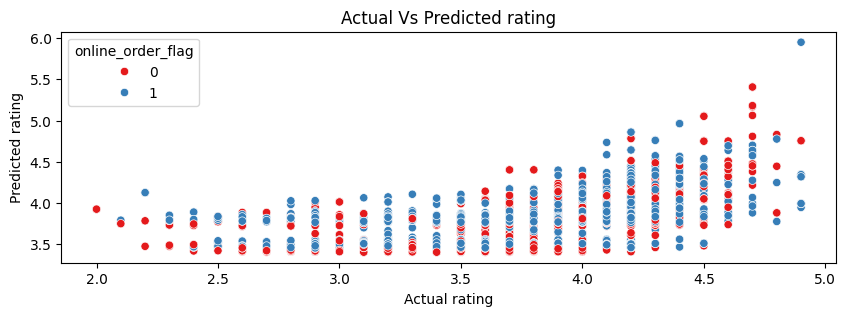

In [35]:
#Actual vs Predicted Plot

plt.figure(figsize= (10,3))

sns.scatterplot(x = Y_test, y = Y_pred , hue = data.loc[Y_test.index,'online_order_flag'] , palette= 'Set1')
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual Vs Predicted rating")
plt.show()

#### Actual vs Predicted Plot --Insight
* The plot shows a clear relationship between actual and predicted ratings,
* Indicating that the model captures the overall trend in the data.


In [36]:
print("\n\t\t\t Dataset Preview")

data.head().T


			 Dataset Preview


,0,1,2,3,4
address,"942, 21st Main Road, 2nd Stage, Banashankari, ...","2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...","1112, Next to KIMS Medical College, 17th Cross...","1st Floor, Annakuteera, 3rd Stage, Banashankar...","10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
name,Jalsa,Spice Elephant,San Churro Cafe,Addhuri Udupi Bhojana,Grand Village
online_order,Yes,Yes,Yes,No,No
book_table,Yes,No,No,No,No
rate,4.1,4.1,3.8,3.7,3.8
votes,775,787,918,88,166
location,Banashankari,Banashankari,Banashankari,Banashankari,Basavanagudi
rest_type,Casual Dining,Casual Dining,"Cafe, Casual Dining",Quick Bites,Casual Dining
cuisines,"North Indian, Mughlai, Chinese","Chinese, North Indian, Thai","Cafe, Mexican, Italian","South Indian, North Indian","North Indian, Rajasthani"
approx_cost(for two people),800.0,800.0,800.0,300.0,600.0


**Insight:**  
The dataset preview shows the final set of features used for regression modeling.


---

## Overall Conclusion

* This task focused on building a regression model using aggregated and engineered features.
* Data aggregation helped summarize customer behavior, pricing, and location information.
* The model achieved reasonable performance, showing that these feature are useful for predicting restaurant ratings.

---